# Algoritmo de Deutsch-Josza

### Importamos las herramientas necesarias:

In [2]:
import qiskit

In [3]:
from qiskit import *

In [62]:
from qiskit.visualization import plot_histogram

In [5]:
import matplotlib

In [6]:
%matplotlib inline

### Función (constante o balanceada) a analizar
Realizaremos dos ejemplos del algoritmo de Deutsch-Josza, uno con una función constante y otro con una función balanceada. Para ambos ejemplos consideraremos n=3.

En general, para implementar n>2 se necesitan compuertas controladas con más de 2 qubits de control. En su tarea 3 (ejercicio 2) hicieron un ejercicio en el que construían una compuerta con 5 qubits de control. Qiskit tiene implementaciones similares haciendo uso de resultados teóricos. Algunas de ellas están descritas en

https://qiskit.org/documentation/locale/de_DE/_modules/qiskit/aqua/circuits/gates/multi_control_toffoli_gate.html

Y pueden importarlas directamente utlizando el código

**from qiskit.aqua.circuits.gates.multi_control_toffoli_gate import "la compuerta que les interese"**

#### Función constante
Como primer caso consideremos la función constante f(x1,x2,x3)=1. Para la implementación del algoritmo cuántico necesitamos construir el oráculo (la caja negra) que realiza la operación de f en un circuito cuántico, es decir, el operador Uf.

In [20]:
Uf = QuantumCircuit(4)

In [21]:
Uf.x(3)

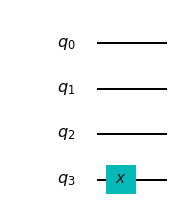

In [22]:
Uf.draw(output = 'mpl')

#### Función balanceada
Consideremos ahora la función balanceda g(0,0,0)=1, g(0,0,1)=1, g(0,1,0)=0, g(0,1,1)=1, g(1,0,0)=0, g(1,0,1)=0, g(1,1,0)=0, g(1,1,1)= 1. Nuevamente, para la implementación del algoritmo cuántico necesitamos construir el oráculo (la caja negra) que realiza la operación de g en un circuito cuántico, es decir, el operador Ug.

In [23]:
Ug = QuantumCircuit(4)

In [24]:
Ug.x(1)
Ug.x(2)
Ug.ccx(1,2,3)
Ug.x(1)
Ug.x(2)
Ug.ccx(0,1,3)

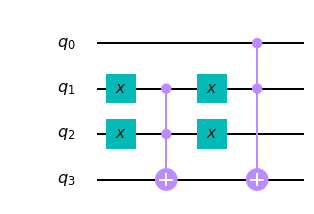

In [25]:
Ug.draw(output = 'mpl')

#### Definir los operadores Uf y Ug como funciones de python
Únicamente por simplicidad en la implementación del algoritmo, y para ejemplificar el uso de las herramientas inherentes a python en qiskit, definamos las compuertas Uf y Ug com funciones de python.

In [26]:
def uf(circuit):
    circuit.x(3)
    
def ug(circuit):
    circuit.x(1)
    circuit.x(2)
    circuit.ccx(1,2,3)
    circuit.x(1)
    circuit.x(2)
    circuit.ccx(0,1,3)

### Construcción del circuito para el algoritmo de Deutsch-Josza

En el caso del algorimto de Deutsch-Josza (con n=3) requerimos 4 qubits y 3 bits clásicos para guardar los resultados de las mediciones.

In [109]:
n = 3

In [110]:
qc = QuantumCircuit(n+1,n)

In [111]:
for i in range(0,n):
    qc.h(i)

qc.x(3)
qc.h(3)

In [112]:
qc.barrier(range(0,n+1))

In [113]:
#Ejemplo con la función constante f
uf(qc)

In [82]:
#Ejemplo con la función balanceada g
ug(qc)

In [114]:
qc.barrier(range(0,n+1))

In [115]:
for i in range(0,n):
    qc.h(i)

In [116]:
qc.measure(range(0,n),range(0,n))

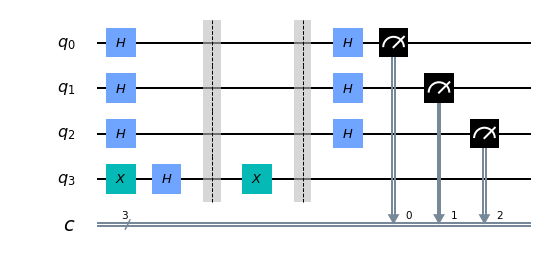

In [117]:
qc.draw(output = 'mpl')

### Simulación y visualización de los resultados

Utilizaremos el simulador "qasm" para simular el circuito construido y visualizaremos los resultados de las mediciones en un histograma.

In [118]:
qasm = Aer.get_backend('qasm_simulator')

In [119]:
job = execute(qc, qasm, shots=1000)
result = job.result()
counts = result.get_counts(qc)

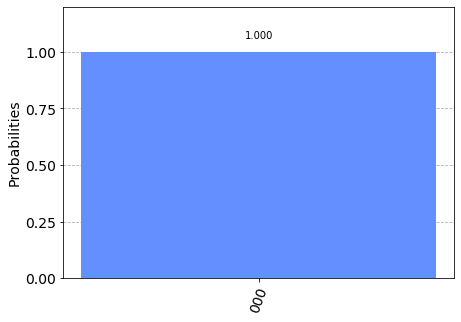

In [127]:
plot_histogram(counts)

### Implementación del algoritmo en las computadoras cuánticas de IBM

In [93]:
IBMQ.load_account()

C:\Users\lfqm1\.conda\envs\Qiskit\lib\site-packages\qiskit\providers\models\backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [121]:
provider = IBMQ.get_provider('ibm-q')

In [122]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [123]:
job = execute(qc, backend = qcomp, shots = 1024)

In [97]:
from qiskit.tools.monitor import job_monitor

In [124]:
job_monitor(job)

Job Status: job has successfully run


In [125]:
result = job.result()
counts2 = result.get_counts(qc)

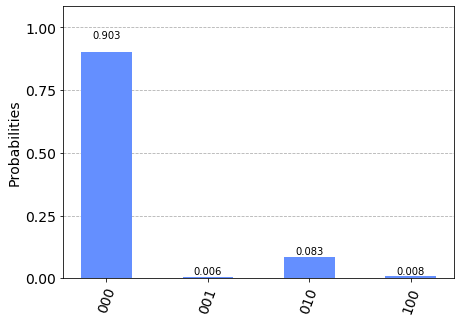

In [126]:
plot_histogram(counts2)